In [384]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import cm
from scipy.stats import norm
import pylab
import pandas as pd
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D
import re

In [385]:
data=pd.read_csv("L2_norm_stats_max_samples_put_options.txt",sep='\t', names=["Stats"])
result = data['Stats'].str.split("':",expand=True)
result.rename(columns={0:'Summary', 1:'Number'}, inplace=True)

In [386]:
result['Number'] = result['Number'].map(lambda x: re.sub('}', '', x))
result['Number'] = result['Number'].map(lambda x: re.sub(']', '', x))
result['Number'] = result['Number'].str.strip('[ ')

In [387]:
result['Number'] = result['Number'].astype(float)
print(result)

                                                                                                                  Summary  \
0   {'The mean residuals from the run of 5 neural networks where L2 is multiplied by 1 is                                   
1   {'The mean maximum deviation from the run of 5 neural networks where L2 is multiplied by 1 is                           
2   {'The mean L1 norm from the run of 5 neural networks where L1 is multiplied by 1 is                                     
3   {'The mean L2 norm from the run of 5 neural networks where L2 is multiplied by 1 is                                     
4   {'The mean L3 norm from the run of 5 neural networks where L3 is multiplied by 1 is                                     
5   {'The standard deviation of the residuals from the run of the 5 neural networks where L2 is multiplied by 1 is:         
6   {'The standard deviation of the maximum deviation from the run of 5 neural networks where L2 is multiplied by 1 is      


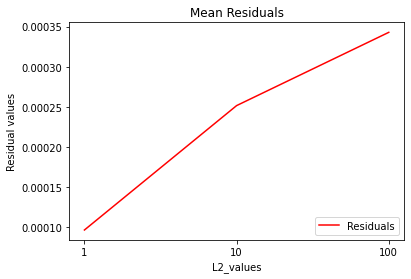

In [394]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(result.iloc[[0,10,20],[1]])
df.insert(0, "L2_values", [0,0.5,1], True) 
df=df.rename(columns={"Number": "Residuals"})
df.plot(kind='line',x='L2_values',y='Residuals',color='red')
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.title("Mean Residuals")
plt.ylabel("Residual values")
plt.legend(loc="lower right")
plt.savefig('Mean_L2_put_residuals.png', dpi=50, bbox_inches='tight')

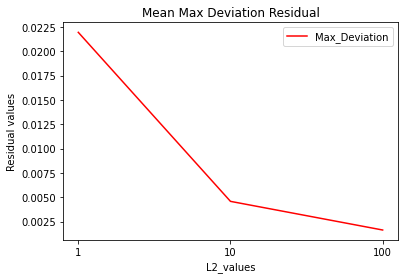

In [395]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(result.iloc[[1,11,21],[1]])
df.insert(0, "L2_values", [0,0.5,1], True) 
df=df.rename(columns={"Number": "Max_Deviation"})
df.plot(kind='line',x='L2_values',y='Max_Deviation',color='red')
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.title("Mean Max Deviation Residual")
plt.ylabel("Residual values")
plt.legend(loc="upper right")
plt.savefig('Mean_Max_L2_put_residuals.png', dpi=50, bbox_inches='tight')

  Index  L1_values     L2_values  L3_values  Total_Residual_Value
0  0     0.000019   3.237647e-05  0.000045   0.000097            
1  0.5   0.000130   2.474871e-07  0.000097   0.000227            
2  1     0.000164   1.341213e-08  0.000166   0.000330            


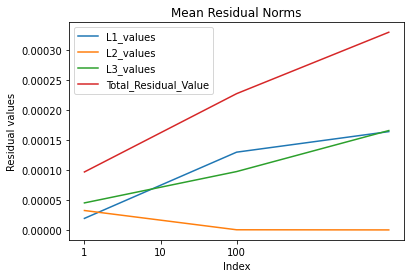

In [396]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(new_index,columns=['Index'])
df1 = pd.DataFrame(result.iloc[[2,12,22],[1]])
df.insert(1, "L1_values",df1.values) 
df2 = pd.DataFrame(result.iloc[[3,13,23],[1]])
df.insert(2, "L2_values",df2.values) 
df3 = pd.DataFrame(result.iloc[[4,14,24],[1]])
df.insert(3, "L3_values",df3.values) 
df.insert(4,"Total_Residual_Value",df3.values+df2.values+df1.values)
print(df)
df.plot(x="Index", y=["L1_values", "L2_values", "L3_values","Total_Residual_Value"], kind="line")
plt.title("Mean Residual Norms")
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.ylabel("Residual values")
plt.legend(loc="upper left")
plt.savefig('Mean_Total_L2_put_residuals.png', dpi=50, bbox_inches='tight')

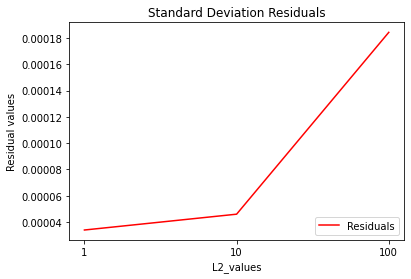

In [397]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(result.iloc[[5,15,25],[1]])
df.insert(0, "L2_values", [0,0.5,1], True) 
df=df.rename(columns={"Number": "Residuals"})
df.plot(kind='line',x='L2_values',y='Residuals',color='red')
plt.title("Standard Deviation Residuals")
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.ylabel("Residual values")
plt.legend(loc="lower right")
plt.savefig('Standard_deviation_L2_put_residuals.png', dpi=50, bbox_inches='tight')

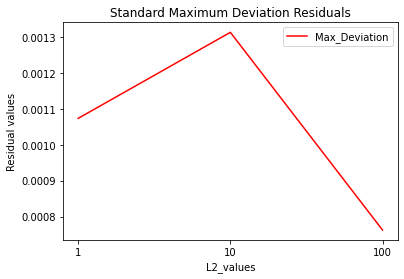

In [398]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(result.iloc[[6,16,26],[1]])
df.insert(0, "L2_values", [0,0.5,1], True) 
df=df.rename(columns={"Number": "Max_Deviation"})
df.plot(kind='line',x='L2_values',y='Max_Deviation',color='red')
plt.title("Standard Maximum Deviation Residuals")
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.ylabel("Residual values")
plt.legend(loc="upper right")
plt.savefig('Maximum_Standard_deviation_L2_put_residuals.png', dpi=50, bbox_inches='tight')

  Index  L1_values     L2_values  L3_values  Total_Residual_Value
0  0     0.000005   5.162174e-06  0.000042   0.000052            
1  0.5   0.000024   2.314609e-07  0.000029   0.000053            
2  1     0.000045   1.705396e-08  0.000125   0.000171            


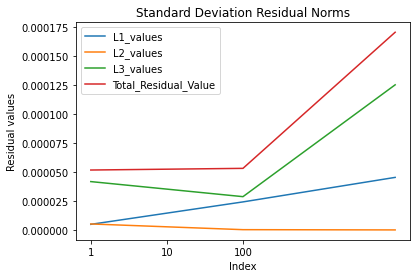

In [399]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(new_index,columns=['Index'])
df1 = pd.DataFrame(result.iloc[[7,17,27],[1]])
df.insert(1, "L1_values",df1.values) 
df2 = pd.DataFrame(result.iloc[[8,18,28],[1]])
df.insert(2, "L2_values",df2.values) 
df3 = pd.DataFrame(result.iloc[[9,19,29],[1]])
df.insert(3, "L3_values",df3.values) 
df.insert(4,"Total_Residual_Value",df3.values+df2.values+df1.values)
print(df)
df.plot(x="Index", y=["L1_values", "L2_values", "L3_values","Total_Residual_Value"], kind="line")
plt.title("Standard Deviation Residual Norms")
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.ylabel("Residual values")
plt.legend(loc="upper left")
plt.savefig('Total_Standard_deviation_L2_put_residuals.png', dpi=50, bbox_inches='tight')